In [0]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, scale
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os
from numpy.random import seed
seed(1)

In [2]:
drive.mount('/content/drive', force_remount=True)
%ls

Mounted at /content/drive
drive/  sample_data/


In [3]:
%cd "drive/My Drive/ChiragBTP"
%ls

/content/drive/My Drive/ChiragBTP
 acf_1dcnn_v2.ipynb                'GUI for Audio Scene Recognition (1).ipynb'
 acf_awgn_features.py               models/
 acf_features.py                    plot_acf_features.py
 ACF_plots.ipynb                    plots/
 cnn_1d.py                          raw_data/
 cnn_1d_v2.py                       sandbox.ipynb
 cnn.py                             sets_labels/
 code/                              spectrogram_generator.py
'Confusion plots.ipynb'             split_audio_file.py
 create_ACF_train-test_sets.ipynb  'Splitting audio samples.ipynb'
 create_MFCC_dataset.py             svm.ipynb
 extract_features.py                svm.py
 feature_extraction.ipynb           Untitled.py
 features/


In [0]:
frame_size = 1000
train_set_file = os.path.join('sets_labels', 'MFCC', '1hr', str(frame_size)+'ms', 'train_set.csv')
test_set_file = os.path.join('sets_labels', 'MFCC', '1hr', str(frame_size)+'ms', 'test_set.csv')
train_label_file = os.path.join('sets_labels', 'MFCC', '1hr', str(frame_size)+'ms', 'train_labels.csv')
test_label_file = os.path.join('sets_labels', 'MFCC', '1hr', str(frame_size)+'ms', 'test_labels.csv')

plot_file = os.path.join('plots', 'MFCC', 'SVM', str(frame_size)+'ms', 'without_gridsearch_v1.png')
weight_file = os.path.join('models','MFCC','SVM', str(frame_size)+'ms', 'weight_without_gridsearch_v1.sav')
info_file = os.path.join('models', 'MFCC', 'SVM', str(frame_size)+'ms', 'without_gridsearch_v1.txt')
scaler_file = os.path.join('models', 'MFCC', 'SVM', str(frame_size)+'ms', 'scaler_without_gridsearch_v1.sav')

In [0]:
X_train = np.loadtxt(train_set_file)
X_test = np.loadtxt(test_set_file)
Y_train = np.loadtxt(train_label_file)
Y_test = np.loadtxt(test_label_file)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
#scaler_loaded = joblib.load(scaler_file) - to load it
#scaler_loaded.transform(X) - to apply it
X_test_scaled = scaler.transform(X_test)

joblib.dump(scaler, scaler_file)

['models/MFCC/SVM/1000ms/scaler_without_gridsearch_v1.sav']

In [7]:
print('fitting...')
clf = SVC(C=1000, gamma=0.001, kernel='rbf', verbose=5)
clf.fit(X_train_scaled, Y_train)
joblib.dump(clf, weight_file)

# loaded_model = joblib.load(weight_file)
# acc = loaded_model.score(X_test_scaled, Y_test)

fitting...
[LibSVM]

['models/MFCC/SVM/1000ms/weight_without_gridsearch_v1.sav']

In [8]:
acc = clf.score(X_test_scaled, Y_test)
print("acc=%0.3f" % acc)

y_pred = clf.predict(X_test_scaled)
conf_mat = confusion_matrix(Y_test,y_pred)
clf_report = classification_report(Y_test,y_pred)

print(conf_mat)
print(clf_report)

acc=0.999
[[733   0   0   0]
 [  1 699   0   0]
 [  1   0 762   0]
 [  0   0   0 732]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       733
         1.0       1.00      1.00      1.00       700
         2.0       1.00      1.00      1.00       763
         3.0       1.00      1.00      1.00       732

    accuracy                           1.00      2928
   macro avg       1.00      1.00      1.00      2928
weighted avg       1.00      1.00      1.00      2928



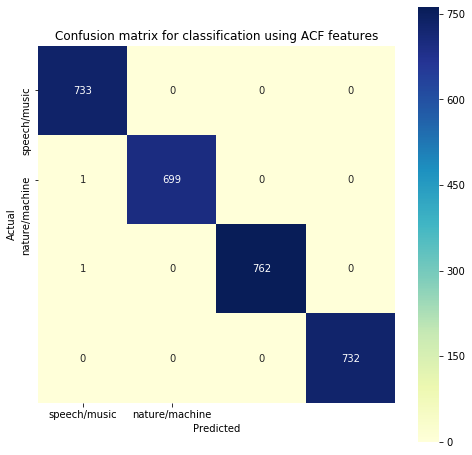

In [9]:
fig, ax = plt.subplots(figsize=(8,8))         
ax = sns.heatmap(conf_mat, annot=True, fmt='d', square=True, cmap="YlGnBu", xticklabels=['Machine', 'Music', 'Speech', 'Nature'], yticklabels=['Machine', 'Music', 'Speech', 'Nature')
               
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix for classification using MFCC features')
#plt.show()
plt.savefig(plot_file)

In [0]:
file_obj = open(info_file, 'w')
params = clf.get_params(deep=False)
file_obj.write("PARAMETERS\n")
for k in params.keys():
  file_obj.write("{} : {}\n".format(k, params[k]))

file_obj.write("\n\nTest accuracy = %0.3f\n\n" % acc)
file_obj.write("CLASSIFICATION REPORT\n")
file_obj.write(clf_report)

file_obj.write("\n\nFILE PATHS\n")
file_obj.write("Training set : {}\n".format(train_set_file))
file_obj.write("Testing set : {}\n".format(test_set_file))
file_obj.write("Weight file : {}\n".format(weight_file))
file_obj.write("Scaler file : {}\n".format(scaler_file))
file_obj.write("CM plot file : {}\n".format(plot_file))
file_obj.close()